<a href="https://colab.research.google.com/github/sibi601/EDA-Hotel_Booking/blob/main/EDA_hotel_booking_analysis_capstoneproject_SIBIN_IQBAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Hotel Booking Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - SIBIN IQBAL


# **Project Summary -**

Introduction:

The purpose of this EDA is to analyze a hotel booking dataset and understand the key trends, patterns and insights related to hotel bookings. The objective is to use this analysis to identify potential opportunities for the hotel to improve its booking performance.

Data Description:

The hotel booking dataset used for this analysis contains columns like hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights etc.
Initially,The dataset contains over  119390 rows and 32 columns.

Data Cleaning and Preparation:

The first step in the analysis was to clean and prepare the data for analysis. This involved removing missing values, converting data into appropriate formats and dealing with any outliers.
It was found that 31994 duplicate rows.So ,I removed the duplicates and finally we had 87396 rows and 32 columns.I removed the null values with relevant values: Four columns were there with null values namely 'company' , 'agent' , 'country' and 'children'then changed the data type of columns 'children' and 'agent'.ThenI added mainly three columns which can be further used in the project for data visualization and for providing more detailed information.They are 'total_night_spent', 'total_guest' and 'earnings'. In order to find the 'total_night_spent' ,I took sum of the columns 'stays_in_week_nights' and 'stays_in_weekend_nights'. I find the 'earnings' by multiplying 'total_night_spent' and 'adr'. Lastly Inorder to find the 'total_guest', I added 'adults', 'children' and 'babies'.

After the above steps Univariate Analysis, Bivariate Analysis, Multivariate Analysis followed by suggestions to client and finally made a conclusion with the prepared analysis.

# **GitHub Link -**

https://github.com/sibi601/EDA-Hotel_Booking

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

There is a lack of insight into customer booking behavior, resulting in poor occupancy rates and revenue. The problem statement is to analyze customer booking data to identify patterns and trends in customer behavior, and use this information to inform decisions that will increase occupancy rates and revenue for the hotel.It mentions the lack of insight into customer booking behavior and it's negative impact, measurable as it mentions about poor occupancy rate and revenue, and actionable as it proposed to analyze data, identify patterns and trends and use that information to make decision.


#### **Define Your Business Objective?**

To inform decisions that will ultimately increase revenue and improve customer satisfaction for the hotel, by optimizing pricing strategies, inventory management, targeting specific customer segments, identifying opportunities for upselling and cross-selling and analyzing distribution channels.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [4]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset

hb_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ASSIGNMENTS/MODULE 1/EDA-CAPSTONE PROJECT/Hotel Bookings.csv")

### Dataset First View

In [6]:
# Dataset First Look
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

rows, cols = hb_df.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  119390
Number of columns:  32


### Dataset Information

In [8]:
# Dataset Info

hb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

duplicate_rows=len(hb_df[hb_df.duplicated()])
duplicate_rows

31994

In [10]:
#Inorder to remove the duplicate rows from the dataset,I use drop_duplicates
hb_df.drop_duplicates(inplace=True)
hb_df.shape # 87936 rows and 32 columns

(87396, 32)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count

missing_values=hb_df.isnull().sum().sort_values(ascending=False)

hb_df.fillna(np.nan,inplace=True)
missing_values

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


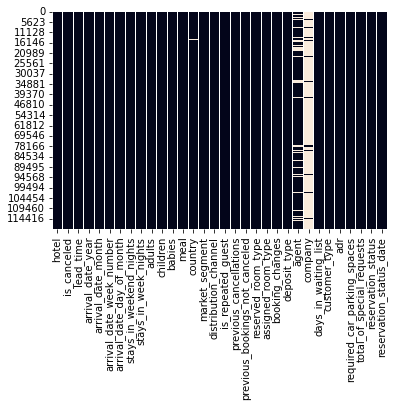

In [12]:
# Visualizing the missing values
#In seaborn library I use the heatmap() function to create a heatmap of missing values in the DataFrame. The heatmap will show the proportion of missing values in each column and row of the DataFrame.
sns.heatmap(hb_df.isnull(), cbar=False)


### What did you know about your dataset?

The dataset given is a dataset from Hotel Industry.

There are 119390 rows and 32 columns in this dataset.There are 31994 duplicate rows in the dataset.After removing duplicates we have 87936 rows and 32 columns.

The columns include information such as the hotel, if the booking was cancelled, the lead time before the arrival date, the arrival date, the number of nights stayed, the number of adults, children, and babies, the meal type, the country of origin, the market segment, the distribution channel, whether the guest is a repeat customer, previous cancellations, previous bookings not cancelled, the type of room reserved and assigned, the number of booking changes, the deposit type, the agent or company that made the booking, the number of days on the waiting list, the customer type, the average daily rate, the number of required car parking spaces, the number of special requests, the reservation status, and the date of the reservation status.

 The goal of this analysis is to understand and analyze patterns and trends in hotel booking data in order to inform business decisions and improve the overall performance of the hotel. This can include identifying factors that affect bookings, such as seasonality and promotions, as well as understanding the characteristics of hotel guests and their booking behaviors.It can also help to identify opportunities for revenue growth and to monitor competitors in the market. Overall, the goal of hotel booking analysis is to use data to gain insights that can inform strategic decision-making and improve overall performance.

## ***2. Understanding Your Variables***

###Knowing the columns

In [39]:
# Dataset Columns
hb_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###Descriptive Summary

In [40]:
# Dataset Describe
hb_df.describe()
#Descriptive summary of all columns 
hb_df.describe().T # To transpose data

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


### Variables Description 

* hotel: indicates the hotel where the booking was made (Resort Hotel or City Hotel)

* is_canceled: indicates if the booking was canceled (1) or not (0)

* lead_time: number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: year of the arrival date

* arrival_date_month: month of the arrival date

* arrival_date_week_number: week number of the arrival date

* arrival_date_day_of_month: day of the month of the arrival date

* stays_in_weekend_nights: number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: number of adults

* children: number of children

* babies: number of babies

* meal: type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* country: country of origin.

* market_segment: market segment designation which customer belongs to.

* distribution_channel: booking distribution channel.In categories, the term “TA” means Travel Agents and “TO” means Tour Operators

* is_repeated_guest: indicates if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: code of room type reserved.

* assigned_room_type: code for the type of room assigned to the booking. 

* booking_changes: number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* deposit_type: indicates if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* days_in_waiting_list: number of days the booking was in the waiting list before it was confirmed to the customer

* customer_type: type of booking -'Transient', 'Contract', 'Transient-Party', 'Group'

* ADR: Average daily rate of the booking.

* required_car_parking_spaces: the number of required car parking spaces

* total_of_special_requests: total number of special request made.

* reservation_status: the number of special requests made, the reservation status (e.g. 'Check-Out', 'Canceled', 'No-Show')

* reservation_status_date: date of the reservation status.

### Check Unique Values for each variable.

In [41]:
# Check Unique Values for each variable.

for col in hb_df.columns:
    print("Unique values in column '{}': {}".format(col, hb_df[col].unique()))

#Similarily in order to find the number of unique value we can use nunique().

for col in hb_df.columns:
    print("Unique values in column '{}': {}".format(col, hb_df[col].nunique()))


Unique values in column 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in column 'is_canceled': [0 1]
Unique values in column 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349

## 3. ***Data Wrangling***

### Data Wrangling Code

####Finding and replacing null values

In [13]:
# Lets fill the columns having null values with the relevant values

print(missing_values[0:4])

company     82137
agent       12193
country       452
children        4
dtype: int64


In [14]:
#Filling company column with zero as company is a numerical column
hb_df['company'].fillna(value=0, inplace=True)

#Filling agent column with zero as agent is a numerical column 
hb_df['agent'].fillna(value=0, inplace=True)

#Filling country column with others as country is an object column 
hb_df['country'].fillna(value='others', inplace=True)

#Filling children column with zero as children is a numerical column 
hb_df['children'].fillna(value=0, inplace=True)

In [15]:
#Checking whether the above columns have null values
hb_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

####Changing the datatype of some required columns

In [16]:
#Changing the datatype of agent and children column as integer datatype

hb_df[['children', 'agent']] = hb_df[['children', 'agent']].astype('int64')

####Addition of new columns

In [17]:
#Inorder to find the total return from each type of hotel, We will find the total number of stays.
#For finding total night spent and adding the column, we can add the columns 'stays_in_week_nights' and 'stays_in_weekend_nights'

hb_df['total_night_spent'] = hb_df['stays_in_week_nights'] + hb_df['stays_in_weekend_nights'] #Column1 - total_night_spent

In [18]:
#Adding the earnings column: We have 'total_night_spent' and 'adr'.So multiplying these two we get the earnings

hb_df['earnings'] = hb_df['total_night_spent'] * hb_df['adr'] #Column2 - earnings
hb_df['earnings']

0            0.00
1            0.00
2           75.00
3           75.00
4          196.00
           ...   
119385     672.98
119386    1578.01
119387    1103.97
119388     730.80
119389    1360.80
Name: earnings, Length: 87396, dtype: float64

In [19]:
#Adding the total number of guests column: We have to add 'adults' , 'children' and 'babies'
hb_df['total_guest'] = hb_df['adults'] + hb_df['children'] + hb_df['babies']
hb_df['total_guest'].sum() # Column3 - total_guest

176999

In [20]:
#For finding the earnings per each type of hotel i.e for City Hotel and Resort Hotel

revenue_per_hotel = hb_df.groupby('hotel')['earnings'].sum()
revenue_per_hotel 

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: earnings, dtype: float64

### What all manipulations have you done and insights you found?

Initially there were 119390 rows and 32 columns. Later, it was found that 31994 duplicate rows.So inorder to avoid repetition I removed the duplicates and finally we had 87396 rows and 32 columns.

Further Manipulations done are as follows:

* First of all inorder to remove the null values with relevant values: Four 
columns were there with null values namely 'company' , 'agent' , 'country' and 'children'.I replaced these 4 columns with zero, zero, others, zero respectively by checking their datatypes and purpose.

* Secondly, Columns 'children' and 'agent' was of datatype float which I changed to integer datatype.

* Thirdly, I added mainly three columns which can be further used in the project for data visualization and for providing more detailed information.They are 'total_night_spent', 'total_guest' and 'earnings'.
In order to find the 'total_night_spent' ,I took sum of the columns 'stays_in_week_nights' and 'stays_in_weekend_nights'. I find the 'earnings' by multiplying 'total_night_spent' and 'adr'. Lastly Inorder to find the 'total_guest', I added 'adults', 'children' and 'babies'.

These are the main manipulations done for making the dataset more meaningful ,better understanding and also to make data vizualization easier.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **I)** *UNIVARIATE ANALYSIS*

#### Chart-1- Which hotel contains maximum number of bookings?

In [43]:
# Chart - 1 visualization code

hotel_group = hb_df.groupby('hotel')
df1=pd.DataFrame((hotel_group.size()/hb_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
explode = [0.05 if i == 0 or i == 1 else 0 for i in range(len(df1))]
plt.figure(figsize = (7,7))
plt.pie(df1['Booking %'], labels = df1['hotel'], autopct = '%1.2f%%',startangle=90,labeldistance=1.1,explode = explode)
plt.title("Booking Percentage by Hotel",bbox={'facecolor':'0.8', 'pad':3})
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I used pie chart inorder to find the maximum number of bookings per hotel as Pie charts are useful to show the proportion of different categories in a dataset. They are especially useful when you have a small number of categories (2-6) and you want to show the relative sizes of each category in a quick and easy-to-understand format. Pie charts are also used to show how a whole is divided into different parts, making it easier to understand the contribution of each part to the whole. 

##### 2. What is/are the insight(s) found from the chart?

City Hotel has 61.13% of bookings done whereas Resort Hotel has only 38.87% booking.Hence, we can conclude that City Hotels have more booking than Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the higher percentage of bookings for City Hotels compared to Resort Hotels can potentially have a positive impact on the business. This information can guide the company in allocating more resources, such as marketing and sales efforts, to City Hotels in order to increase their bookings even further. In the case of Resort Hotels,it may not be marketed effectively to potential customers.Also, City Hotels have more bookings since they are more accessible and also have better amenities/services that attract more customers.
So, Resort Hotel should focus more on marketing, sales efforts, services and amenities that attracts the customers even more.

#### Chart-2- Which hotel has more cancellation?

In [44]:
# Chart - 2 visualization code
sns.set_style("whitegrid")
sns.countplot(x="hotel", data=hb_df, hue="is_canceled", order=["City Hotel","Resort Hotel"]).set(xlabel=None)
plt.legend(loc="upper right")

##### 1. Why did you pick the specific chart?

I used bar plot to find the hotel with more cancellation as bar plots can be used to visualize and compare the frequency or count of categories in a categorical variable. Bar plots help to compare the magnitude of the categories and provide a visual representation of the distribution of data. It is particularly useful when comparing different categories and helps to identify patterns, trends and relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

We can infer that City Hotel has more cancellation of bookings which is 15000  whereas the Resort Hotel has approx 7500.So, we can see that there is almost double cancellation of bookings in City Hotel compared to Resort Hotel eventhough City Hotel has more bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On the positive side, the insight could help the City Hotels identify the reasons behind the high cancellation rate and implement strategies to reduce it. This could improve customer satisfaction and increase customer retention, leading to positive growth for the business.

However, the high cancellation rate could also have a negative impact on the business as it could lead to a decrease in revenue and reduced occupancy rates. If the cancellations are due to issues with the hotel, such as poor service or unmet expectations, it could also damage the reputation of the hotel and negatively impact future bookings. Therefore, it's important to carefully analyze the reasons behind the high cancellation rate and implement effective solutions to mitigate its negative impact on the business.

####Chart-3- What is the proportion of bookings made for each meal type?

In [45]:
# Chart - 3 visualization code
meal_group = hb_df.groupby('meal')
df1 = pd.DataFrame((meal_group.size()/hb_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
print(df1)
explode = [0.05 if i == 0 else 0 for i in range(len(df1))]
plt.figure(figsize = (7,7))
plt.pie(df1['Booking %'], labels = df1['meal'], autopct = '%1.2f%%', startangle=90, labeldistance=1.1, explode = explode)
plt.title("Booking Percentage by Meal Type", bbox={'facecolor':'0.8', 'pad':3})
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I used pie chart to find the proportion of bookings made for each meal type as Pie charts are useful to show the proportion of different categories in a dataset. They are especially useful when you have a small number of categories (2-6) and you want to show the relative sizes of each category in a quick and easy-to-understand format. Pie charts are also used to show how a whole is divided into different parts, making it easier to understand the contribution of each part to the whole. 

##### 2. What is/are the insight(s) found from the chart?

We can infer that:

* BB(Bed and Breakfast) is most preffered by the customers who booked the hotel.
* Secondly,About 10.5 to 11% of customers prefer HB(Breakfast and Dinner) and SC (Self Catering).
* Finally,only about 0.41% FB(Full Board) is prefferd which is the least among all.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can help the hotel in creating a positive business impact by making informed decisions about the types of meal packages to offer and their pricing. For example, if the demand for BB is high, the hotel can focus on promoting and improving this package.

However, the low percentage of FB bookings may not necessarily mean there is low demand for this package. There could be other factors such as limited availability or high pricing that are affecting the bookings. Similarly, the percentage of HB bookings may not necessarily lead to negative growth.

####Chart-4- What is the distribution of days elapsed between entering a booking and arrival date(Lead Time)?

In [46]:
# Chart - 4 visualization code

lead_time = hb_df['lead_time'] # extract the lead_time column
sns.set_style("whitegrid")
plt.figure(figsize = (10,10))
plt.boxplot(lead_time)
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time")
plt.show()

##### 1. Why did you pick the specific chart?

I used box plot to find the distribution of days elapsed between entering a booking and arrival date(Lead Time) as box plots are useful to visualize the distribution of a set of continuous or numerical data points. They provide a summary of the distribution of the data, including the minimum value, first quartile, median, third quartile, and maximum value. By visualizing the range, skewness, and presence of outliers in the data, box plots help to identify and understand the underlying patterns and relationships in the data. They are also useful for comparing the distributions of different groups or datasets, making them a valuable tool in the EDA process.

##### 2. What is/are the insight(s) found from the chart?

We can infer that:

* By analyzing q1 ie 1st quartile, 25% of the lead time are below 10.
* By analyzing q3 ie 3rd quartile, 25% of the lead time are above 125.
* Almost 50% ie Interquartile range of the lead time are between 10 and 125 which is shown inside the box.
* Solid line in the plot indicates the median which is close to 50.
* Maximum point without outlier is 290 and minimum point is zero(This is usually 1.5 times the interquartile range)
* Points after the max T shaped whisker are known as Outliers and the maximum lead time here is 737.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the box plot of lead time can help create a positive business impact by providing information about the distribution of lead times. This information can help the company understand the typical lead times and make informed decisions about inventory management, staffing, and customer service. For example, if the company knows that the majority of lead times are between 10 and 125, they can ensure that they have enough resources to meet the demand during this time.

On the other hand, the presence of outliers can have a negative impact on the business. The outliers represent lead times that are much higher than the typical lead times, which can cause delays in delivering the product or service to customers. This can result in customer dissatisfaction and lost business opportunities. The company should investigate the reasons for these outliers and take steps to minimize them in the future.

####Chart-5- What are the total number of guests arrived per year in both hotels? 

In [47]:
# Chart - 5 visualization code

sns.set_style("whitegrid")
sns.countplot(x="arrival_date_year", data=hb_df, hue="hotel", hue_order=["City Hotel","Resort Hotel"]).set(xlabel=None)
plt.legend(loc="upper right")


##### 1. Why did you pick the specific chart?

I used bar plot to find the number of guests arrived per year in both hotels as bar plots can be used to visualize and compare the frequency or count of categories in a categorical variable. Bar plots help to compare the magnitude of the categories and provide a visual representation of the distribution of data. It is particularly useful when comparing different categories and helps to identify patterns, trends and relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

We can infer that:
* In **2015**: Total number of guests arrived in Resort Hotel is slightly higher than City Hotel which is 6000 approximately.
* In **2016** and **2017**: Total number of guests arrived in City Hotel is higher than Resort Hotel with a huge margin. In 2016 ,City Hotel has more than 25000 bookings whereas Resort Hotel has 15000 bookings. In 2017, City Hotel has 20000 bookings whereas Resort Hotel has 11000 bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive impact on the business as they provide information on which type of hotel is more popular and in demand among the guests. Based on this information, the hotel can focus more on the marketing and promotion of the more popular hotel and also improve the services provided at the less popular hotel to increase its popularity.Since 2016 receive good bookings when compared to other years,the customers may have a good seasonal impact for their vacations and trips.

The insights gained from the above analysis may lead to a negative impact if:

* The shift of guests from Resort Hotel to City Hotel is due to any negative factor in the Resort Hotel such as poor quality of service, inadequate amenities, etc. This may result in a decline in reputation and lead to a decrease in bookings for the Resort Hotel.
* The increase in bookings for City Hotel may result in overcrowding and strain on the available resources, leading to a decline in the quality of service offered. This may in turn result in a decline in customer satisfaction and a decrease in future bookings.

#### Chart-6- What is the proportion of bookings made for each market segment?


In [48]:
# Chart - 6 visualization code

market_group = hb_df.groupby('market_segment')
df1 = pd.DataFrame((market_group.size()/hb_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
print(df1)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
plt.bar(df1['market_segment'], df1['Booking %'])
plt.xlabel('Market Segment')
plt.ylabel('Booking Percentage')
plt.title("Booking Percentage by Market Segment")
plt.show()

##### 1. Why did you pick the specific chart?

I used bar plot to find the proportion of bookings made for each market segment as bar plots can be used to visualize and compare the frequency or count of categories in a categorical variable. Bar plots help to compare the magnitude of the categories and provide a visual representation of the distribution of data. It is particularly useful when comparing different categories and helps to identify patterns, trends and relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

We can infer that:
The insight shows that Online Travel Agencies (OTA) are responsible for 59.06% of bookings, whereas Direct bookings contribute to 13.506% of bookings. On the other hand, market segments such as Aviation, Complementary, and Corporate account for a much smaller percentage of bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be used to focus marketing efforts on Online Travel Agencies to increase bookings. The hotel can also consider offering incentives to OTAs to increase their bookings further.

However, relying heavily on one market segment (OTA) for bookings can also lead to negative growth if that segment experiences a decline. Diversifying the hotel's customer base by targeting other market segments can help mitigate this risk and ensure more stable revenue.

#### Chart-7- What is the distribution of stays by the deposit type?


In [49]:
# Chart - 7 visualization code

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.violinplot(x=hb_df["deposit_type"], y=hb_df["total_night_spent"])
plt.xlabel("Deposit Type")
plt.ylabel("Total Stays")
plt.title("Distribution of Stays by Deposit Type")
plt.show()

##### 1. Why did you pick the specific chart?

I used violin plot to find distribution of stays by the deposit type as a violin plot is used to visualize the distribution of a dataset. It is a combination of a box plot and a kernel density plot, providing a more nuanced view of the data distribution than a box plot alone.

In a violin plot, the width of the plot at each data point is proportional to the density of data points at that value, allowing you to see both the distribution of the data as well as any outliers. Additionally, a violin plot can display multiple datasets in a compact format, making it useful for comparing distributions between groups or between variables.

##### 2. What is/are the insight(s) found from the chart?

We can infer that:
About 70 night stays come from the customers who choose No Deposit option for booking.About 15 night stays come from Refundable Deposit type and approx 25 night stays comes from Non-refund deposit type.
Since we use Violin Plot here, we can easily know the density of stays.In No deposit type, Density is more in range of 3 to 5 nights. In Refundable Deposit type and Non-Refund Deposit type, density is more in 5 nights.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin plot may help create a positive business impact by providing a better understanding of the distribution of customer preferences for different deposit types. For example, it shows that the majority of customers prefer the No Deposit option, and that most stays in this category fall between 3 to 5 nights. This information could be used to optimize the hotel's sales and marketing strategies, such as offering special promotions or discounts to customers who book No Deposit stays of 3-5 nights.

However, it is important to consider other factors that could impact the business. For example, while No Deposit may be the preferred option, it could also lead to a higher number of cancellations or no-shows, which could negatively impact the business. Similarly, the Refundable Deposit type may have a lower density, but it could result in higher revenue for the hotel due to the deposit fee. Therefore, it is important to consider the overall impact of these deposit types on the hotel's revenue and operations before making any business decisions based on the insights gained from the violin plot.

#### Chart-8- What is the average night stays by the country?

In [50]:
# Chart - 8 visualization code

country_group = hb_df.groupby("country")
average_stays = country_group["total_night_spent"].mean()
print(average_stays.max())
plt.figure(figsize=(40, 10))
sns.set_style("whitegrid")
plt.plot(average_stays.index, average_stays.values)
plt.xlabel("Country")
plt.ylabel("Average night Stays")
plt.title("Average night Stays by Country")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

I used line plot to find the average night stays by the country as Line plots are used to visualize the trends and patterns in a dataset over time. Line plots help to analyze the changes in the values of a numerical variable with respect to another numerical or categorical variable. It helps to identify the relationship between two variables and detect any anomalies or outliers in the data. Line plots are also useful in visualizing the movement and changes in the mean, median, or other central tendency measures of a dataset over time. They provide a quick and simple way to understand how the data changes and to gain insights into the trends and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

We can infer from the plot that:

* Country FRO has the highest average stays of approx 11 nights.
* Countries ASM,BFA,COM,DJI,HND,MDG,MLI has least average stay of 1 night.
* SEN and AGO has an average night stay of 9 and 8 respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the line plot of average night stays by country can be used to identify the most popular countries among the guests. This information can help the hotel management to target their marketing efforts towards the countries with higher average stays.

On the other hand, countries with lower average stays can be an indication of less popularity or lower demand. The hotel management may consider finding ways to improve their services in these countries to attract more guests and increase their average stays.

It is not possible to determine from this information alone whether there are any insights that lead to negative growth.





####Chart-9- Which travel agency (Agent) does the maximum bookings?

In [51]:
# Chart - 9 visualization code

df5 = hb_df['agent'].value_counts().reset_index().rename(columns = {'index':'agent','agent':'Bookings'}).sort_values(by = 'Bookings', ascending = False)
df5.drop(df5[df5['agent'] == 0].index, inplace = True)    #Dropping the bookings which are not done by the agent        
df5 = df5[:5]  
print(df5)      #Finding the top five bookings made by the travel agency                                           
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
sns.barplot(x = 'agent', y = 'Bookings', data = df5, order = df5.sort_values('Bookings', ascending = False).agent)
df5.sort_values('Bookings', ascending=False, inplace=True)
min_booking_agent = df5.iloc[0]['agent']


##### 1. Why did you pick the specific chart?

I used bar plot  to find which travel agency (Agent-ID) made the maximum number of bookings as bar plots can be used to visualize and compare the frequency or count of categories in a categorical variable. Bar plots help to compare the magnitude of the categories and provide a visual representation of the distribution of data. It is particularly useful when comparing different categories and helps to identify patterns, trends and relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

We can infer that 
* Agent 9 has the highest number of bookings, with 28759 bookings.
* Agent 240 has the second highest number of bookings, with 13028 bookings.
* Agents 14, 7, 250 have relatively lower number of bookings, with 3349, 3300, and 2779 bookings respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impact by identifying the top performing agents who are contributing the most to the bookings. This information can be used to reward and incentivize these agents, and to better allocate resources to support their sales efforts. This could lead to an increase in bookings and revenue for the business.
The insights gained from the data do not necessarily lead to negative growth. 

However, the lower number of bookings for agents 14, 7, and 250 compared to agents 9 and 240 indicate that there may be opportunities for improvement in the performance of these agents. It may be useful to investigate further and understand the reasons for the lower bookings, such as lack of training, inadequate support, or issues with the booking process, and implement measures to address these issues to increase their performance.

#### Chart-10- What are the earnings of each type of hotel?

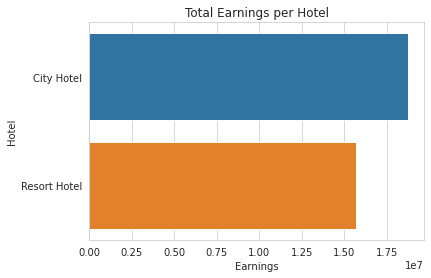

hotel
City Hotel      18774101.54
Resort Hotel    15686837.77
Name: earnings, dtype: float64


In [ ]:
# Chart - 10 visualization code

revenue_per_hotel = hb_df.groupby('hotel')['earnings'].sum()

sns.set_style('whitegrid')
sns.barplot(x=revenue_per_hotel.values, y=revenue_per_hotel.index, orient='h')
plt.title('Total Earnings per Hotel')
plt.xlabel('Earnings')
plt.ylabel('Hotel')

plt.show() 
print(revenue_per_hotel)

##### 1. Why did you pick the specific chart?

I used bar plot  to find the earnings of each type of hotel as bar plots can be used to visualize and compare the frequency or count of categories in a categorical variable. Bar plots help to compare the magnitude of the categories and provide a visual representation of the distribution of data. It is particularly useful when comparing different categories and helps to identify patterns, trends and relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

We can infer that 

City Hotel generated more revenue than the Resort Hotel. Specifically, the City Hotel earned Rs 1,87,74,101.54, while the Resort Hotel earned Rs 1,56,86,837.77.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impacts such as:

* Marketing Strategy: The higher revenue generated by the City Hotel could suggest that there is a higher demand for urban hotels compared to resort hotels. Based on this insight, the business could allocate more resources towards marketing and promoting the City Hotel, especially to the target market of urban travelers.

* Revenue Management: The business could adjust its revenue management strategy based on the earnings data to maximize profitability. For example, they could increase prices during peak demand periods and decrease prices during low-demand periods, in order to optimize occupancy rates and earnings.

* Investment Decisions: The business could use this data to guide investment decisions. For example, they could allocate more resources towards the City Hotel for further improvements, expansion, and innovation, while being more conservative with investments in the Resort Hotel.

### **II)** *BIVARIATE ANALYSIS*

####Chart-10- 

In [52]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-11- 

In [53]:
# Chart - 11 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-12-





In [54]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-13- 

In [55]:
# Chart - 13 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-14- How does the meal type impact the number of nights stayed?

In [56]:
# Chart - 14 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-15-

In [57]:
# Chart - 15 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-16- 

In [58]:
# Chart - 16 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-17- 


In [59]:
# Chart - 17 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

####Chart-18- 


In [60]:
# Chart - 18 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-19- 


In [61]:
# Chart - 19 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

We can infer that:

* Eventhough City Hotel has more bookings than Resort Hotel,the cancellations are high in City Hotel than Resort Hotel.

* Number of customers who does the booking and made a no show is more in City Hotel than Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart-20- 

In [62]:
# Chart - 20 visualization code



##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

### **III)** *MULTIVARIATE ANALYSIS*

#### Chart-21- Correlation Heatmap

In [63]:
# Correlation Heatmap visualization code



###### 1. Why did you pick the specific chart?

###### 2. What is/are the insight(s) found from the chart?

#### Chart-22- Pair Plot 

In [64]:
# Pair Plot visualization code


In [65]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

# **Conclusion**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***